In [19]:
from scipy import stats 
import pandas as pd
import numpy as np
import base64,os,random,gc
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


import matplotlib.pyplot as plotter
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import optuna
import xgboost as xgb
from xgboost import XGBClassifier
import catboost
from catboost import CatBoostClassifier
#import lightgbm as lgbm
#from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn import datasets
optuna.logging.set_verbosity(optuna.logging.WARNING)
#from lightgbm import *
pd.set_option("display.max_columns", None)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#import eli5
#from eli5.sklearn import PermutationImportance

import warnings
warnings.filterwarnings('ignore')

In [140]:
df = pd.read_csv('/Users/raghuramjupudi/Downloads/ocd_patient_dataset.csv')


In [141]:
data = df

# Exploratory Data Analysis

In [142]:
data.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,None,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,None


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1500 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [144]:
data['Previous Diagnoses'].unique()

array(['MDD', 'None', 'PTSD', 'GAD', 'Panic Disorder'], dtype=object)

In [201]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient ID,1500.0,5541.254000,2562.389469,1017.0,3338.0,5539.5,7745.5,9995.0
Age,1500.0,46.781333,16.830321,18.0,32.0,47.0,61.0,75.0
Gender,1500.0,1.502000,0.500163,1.0,1.0,2.0,2.0,2.0
Ethnicity,1500.0,2.572000,1.099222,1.0,2.0,3.0,4.0,4.0
Marital Status,1500.0,1.997333,0.824083,1.0,1.0,2.0,3.0,3.0
Education Level,1500.0,2.481333,1.130119,1.0,1.0,2.0,4.0,4.0
Duration of Symptoms (months),1500.0,121.745333,67.404610,6.0,64.0,121.0,178.0,240.0
Y-BOCS Score (Obsessions),1500.0,20.048000,11.823884,0.0,10.0,20.0,31.0,40.0
Y-BOCS Score (Compulsions),1500.0,19.626000,11.782870,0.0,9.0,20.0,29.0,40.0


In [145]:
data.isnull().sum()

Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
OCD Diagnosis Date               0
Duration of Symptoms (months)    0
Previous Diagnoses               0
Family History of OCD            0
Obsession Type                   0
Compulsion Type                  0
Y-BOCS Score (Obsessions)        0
Y-BOCS Score (Compulsions)       0
Depression Diagnosis             0
Anxiety Diagnosis                0
Medications                      0
dtype: int64

<Axes: title={'center': 'Data Set'}>

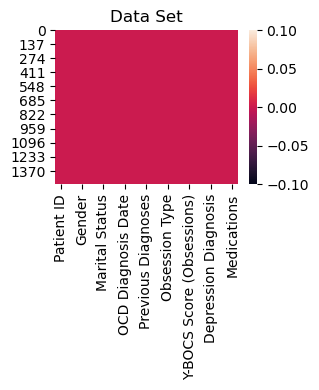

In [146]:
plt.figure(figsize = (10, 2))

plt.subplot(1, 3, 1)
plt.title("Data Set")
sns.heatmap(data.isnull())

<Axes: >

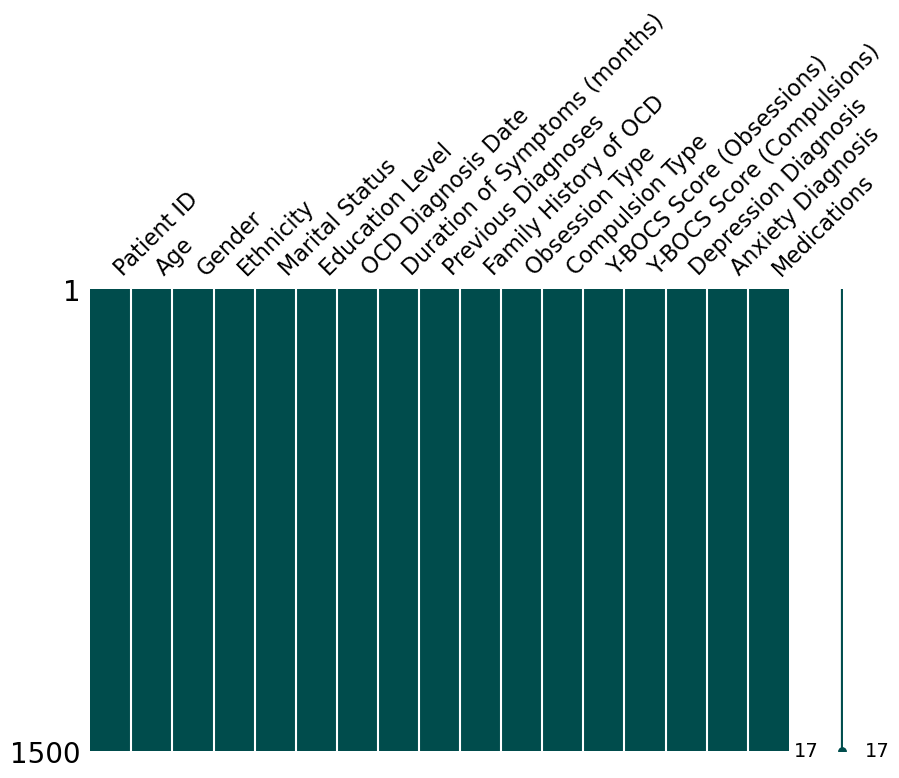

In [147]:
msno.matrix(df=data, figsize=(10,6), color=(0,.3,.3))

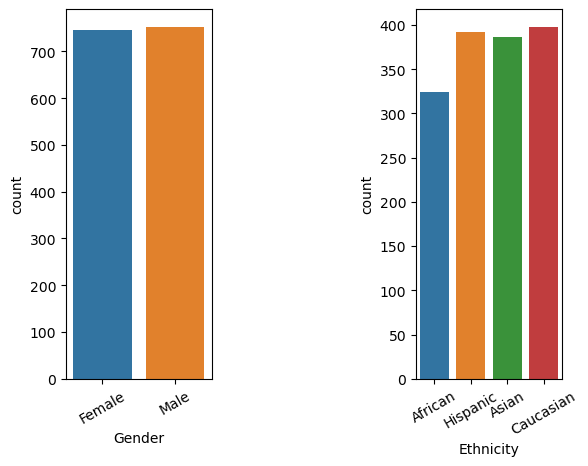

In [148]:
#Checking the data

plt.subplot(1, 3, 1)
sns.countplot(x = data["Gender"])
plotter.xticks(rotation = 30);

plt.subplot(1, 3, 3)
sns.countplot(x = data["Ethnicity"])
plotter.xticks(rotation = 30);

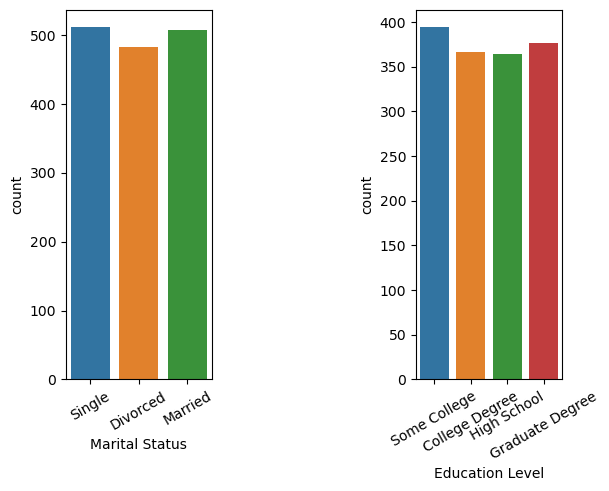

In [149]:
plt.subplot(1, 3, 1)
sns.countplot(x = data["Marital Status"])
plotter.xticks(rotation = 30);

plt.subplot(1, 3, 3)
sns.countplot(x = data["Education Level"])
plotter.xticks(rotation = 30);

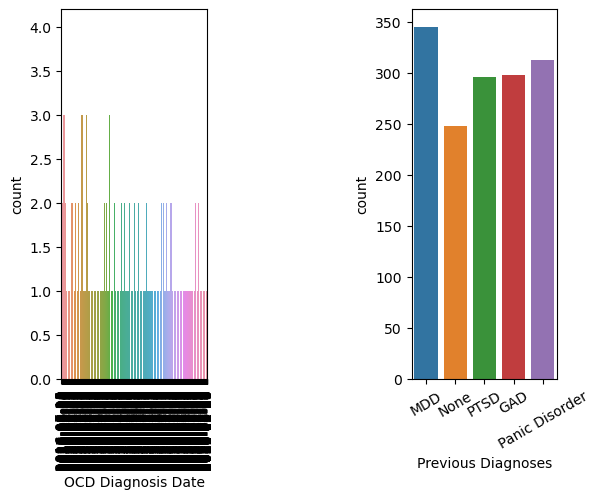

In [150]:
plt.subplot(1, 3, 1)
sns.countplot(x = data["OCD Diagnosis Date"])
plotter.xticks(rotation = 90);

plt.subplot(1, 3, 3)
sns.countplot(x = data["Previous Diagnoses"])
plotter.xticks(rotation = 30);

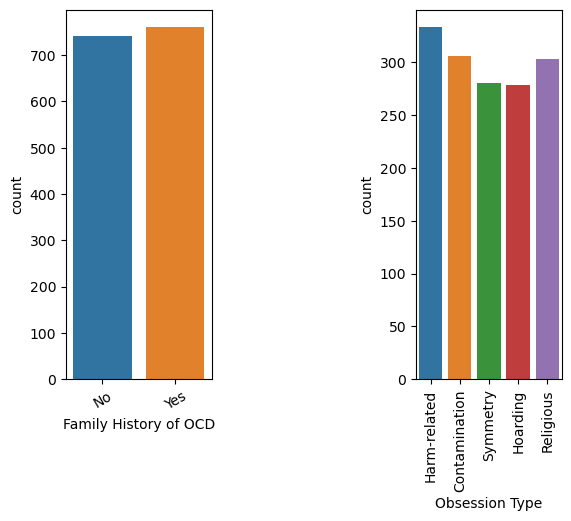

In [151]:
plt.subplot(1, 3, 1)
sns.countplot(x = data["Family History of OCD"])
plotter.xticks(rotation = 30);

plt.subplot(1, 3, 3)
sns.countplot(x = data["Obsession Type"])
plotter.xticks(rotation = 90);

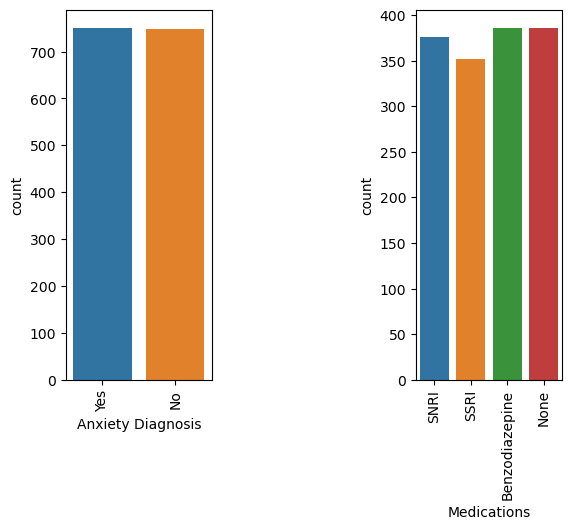

In [152]:
plt.subplot(1, 3, 1)
sns.countplot(x = data["Anxiety Diagnosis"])
plotter.xticks(rotation = 90);

plt.subplot(1, 3, 3)
sns.countplot(x = data["Medications"])
plotter.xticks(rotation = 90);

# Preprocessing

In [153]:
#Changing the categorical values to binary values


data["Gender"] = data["Gender"].replace({'Female':1,'Male':2})
data["Ethnicity"] = data["Ethnicity"].replace({'African':1,'Hispanic':2,'Asian':3,'Caucasian':4})
data["Marital Status"] = data["Marital Status"].replace({'Single':1,'Divorced':2,'Married':3})
data["Education Level"] = data["Education Level"].replace({'Some College':1,'College Degree':2,
                                                             'High School':3,'Graduate Degree':4})
data=data.drop(columns=['OCD Diagnosis Date'],axis=1)
data["Previous Diagnoses"] = data["Previous Diagnoses"].replace({'None':0,'MDD':1,'PTSD':2,'GAD':3,'Panic Disorder':4})
data["Family History of OCD"] = data["Family History of OCD"].replace({'No':1,'Yes':2})
data["Obsession Type"] = data["Obsession Type"].replace({'Harm-related':1,'Contamination':2,'Symmetry':3,
                                                           'Hoarding':4,'Religious':5})
data["Compulsion Type"] = data["Compulsion Type"].replace({'Checking':1,'Washing':2,'Ordering':3,'Praying':4,
                                                             'Counting':5})
data["Depression Diagnosis"] = data["Depression Diagnosis"].replace({'No':1,'Yes':2})
data["Anxiety Diagnosis"] = data["Anxiety Diagnosis"].replace({'No':1,'Yes':2})
data["Medications"] = data["Medications"].replace({'SNRI':0,'SSRI':1,'Benzodiazepine':2, 'None':3})


In [154]:
data

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,1,1,1,1,203,1,1,1,1,17,10,2,2,0
1,2406,69,2,1,2,1,180,0,2,1,2,21,25,2,2,1
2,1188,57,2,2,2,2,173,1,1,2,1,3,4,1,1,2
3,6200,27,1,2,3,2,126,2,2,3,2,14,28,2,2,1
4,5824,56,1,2,3,3,168,2,2,4,3,39,18,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,2,2,2,2,53,1,1,2,2,21,33,2,2,1
1496,5013,19,1,2,2,4,160,3,2,4,4,25,16,2,2,1
1497,6089,40,2,3,3,1,100,0,2,2,5,2,15,2,2,2
1498,3808,37,1,4,3,1,210,3,2,2,2,16,7,2,1,2


In [155]:
#Previous Diagnoses
print("Skewness: %f" % data['Previous Diagnoses'].skew())
print("Kurtosis: %f" % data['Previous Diagnoses'].kurt())

Skewness: -0.001436
Kurtosis: -1.272933


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Patient ID                     1500 non-null   int64
 1   Age                            1500 non-null   int64
 2   Gender                         1500 non-null   int64
 3   Ethnicity                      1500 non-null   int64
 4   Marital Status                 1500 non-null   int64
 5   Education Level                1500 non-null   int64
 6   Duration of Symptoms (months)  1500 non-null   int64
 7   Previous Diagnoses             1500 non-null   int64
 8   Family History of OCD          1500 non-null   int64
 9   Obsession Type                 1500 non-null   int64
 10  Compulsion Type                1500 non-null   int64
 11  Y-BOCS Score (Obsessions)      1500 non-null   int64
 12  Y-BOCS Score (Compulsions)     1500 non-null   int64
 13  Depression Diagnos

<Axes: >

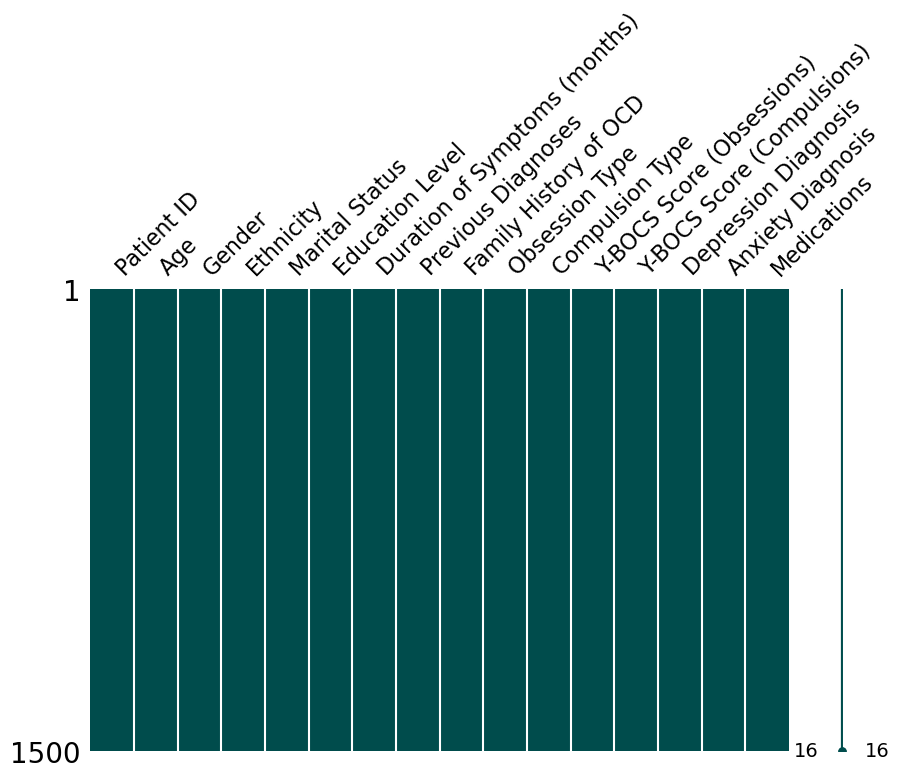

In [157]:
msno.matrix(df=data, figsize=(10,6), color=(0,.3,.3))

In [158]:
train_feature = data.columns.drop('Medications').tolist()
train_feature 

['Patient ID',
 'Age',
 'Gender',
 'Ethnicity',
 'Marital Status',
 'Education Level',
 'Duration of Symptoms (months)',
 'Previous Diagnoses',
 'Family History of OCD',
 'Obsession Type',
 'Compulsion Type',
 'Y-BOCS Score (Obsessions)',
 'Y-BOCS Score (Compulsions)',
 'Depression Diagnosis',
 'Anxiety Diagnosis']

In [159]:
data[train_feature].describe().T\
        .style.bar(subset=['mean'], color=px.colors.qualitative.G10[0])\
        .background_gradient(subset=['std'], cmap='BuPu')\
        .background_gradient(subset=['50%'], cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
Patient ID,1500.000000,5541.254000,2562.389469,1017.000000,3338.000000,5539.500000,7745.500000,9995.000000
Age,1500.000000,46.781333,16.830321,18.000000,32.000000,47.000000,61.000000,75.000000
Gender,1500.000000,1.502000,0.500163,1.000000,1.000000,2.000000,2.000000,2.000000
Ethnicity,1500.000000,2.572000,1.099222,1.000000,2.000000,3.000000,4.000000,4.000000
Marital Status,1500.000000,1.997333,0.824083,1.000000,1.000000,2.000000,3.000000,3.000000
Education Level,1500.000000,2.481333,1.130119,1.000000,1.000000,2.000000,4.000000,4.000000
Duration of Symptoms (months),1500.000000,121.745333,67.404610,6.000000,64.000000,121.000000,178.000000,240.000000
Previous Diagnoses,1500.000000,2.055333,1.386682,0.000000,1.000000,2.000000,3.000000,4.000000
Family History of OCD,1500.000000,1.506667,0.500122,1.000000,1.000000,2.000000,2.000000,2.000000
Obsession Type,1500.000000,2.941333,1.443357,1.000000,2.000000,3.000000,4.000000,5.000000


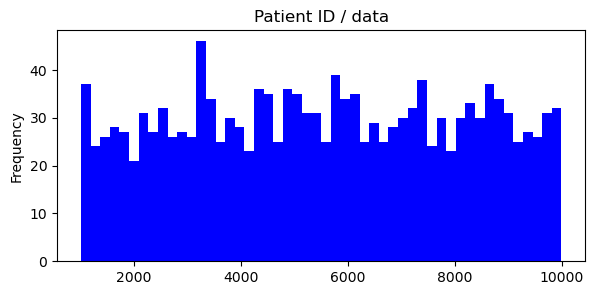

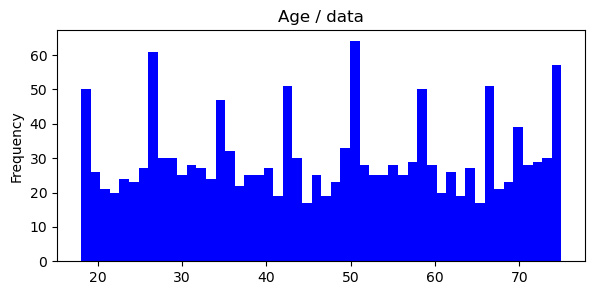

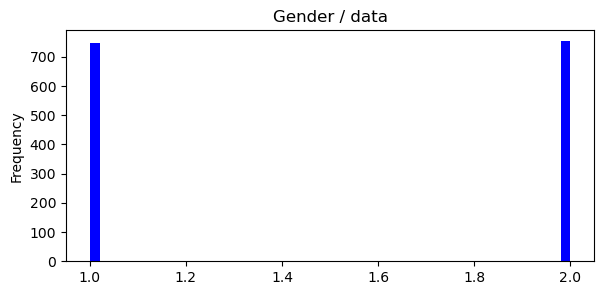

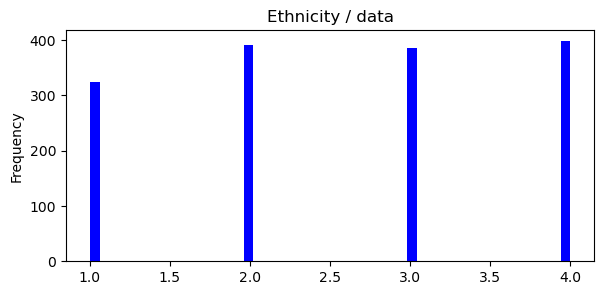

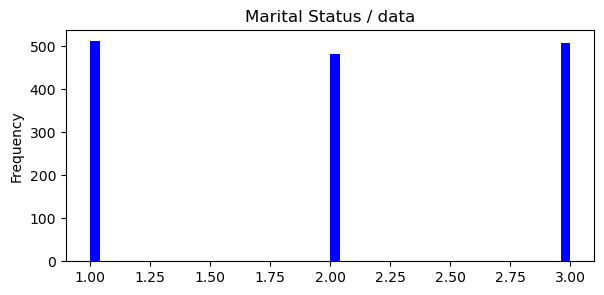

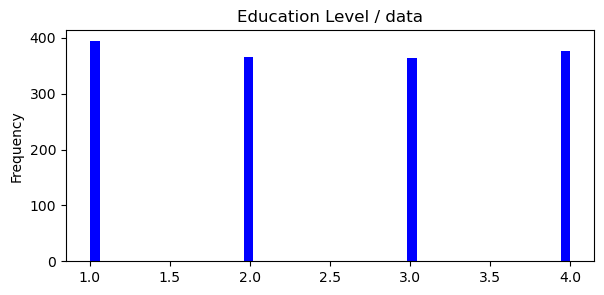

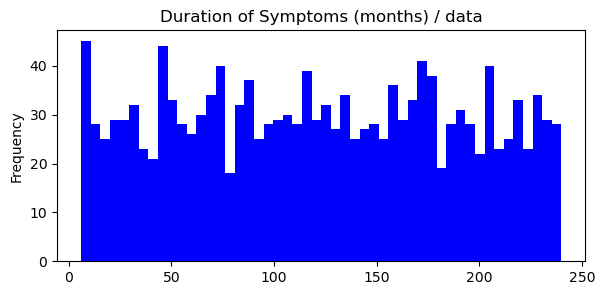

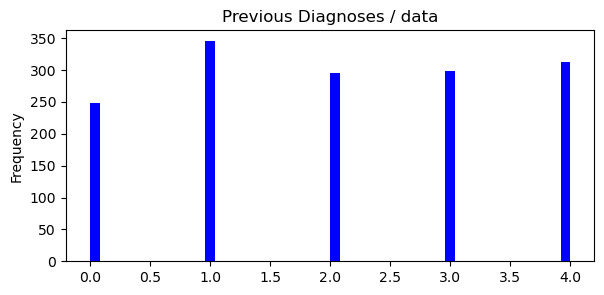

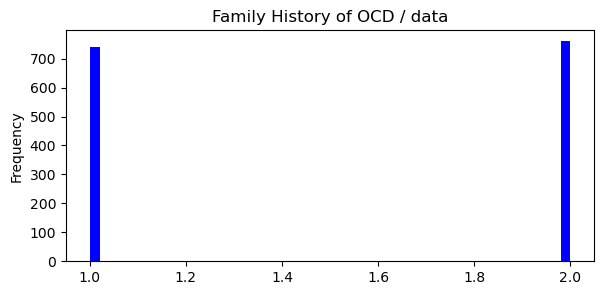

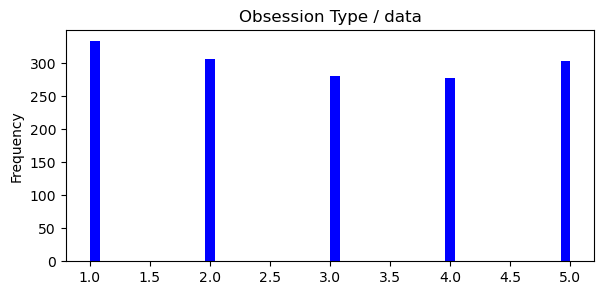

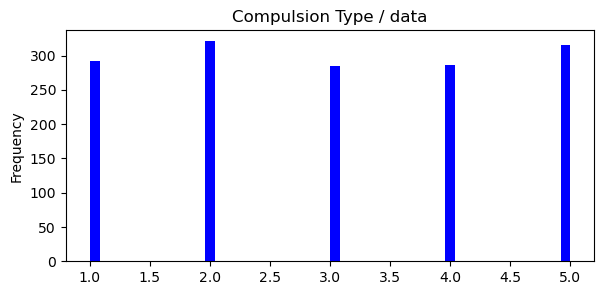

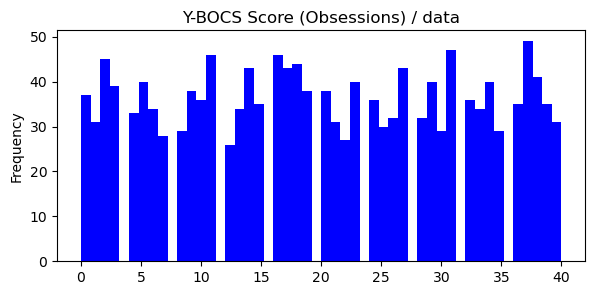

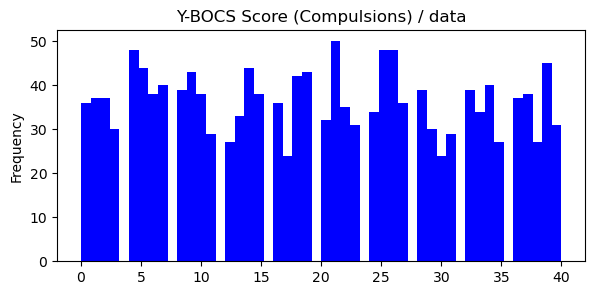

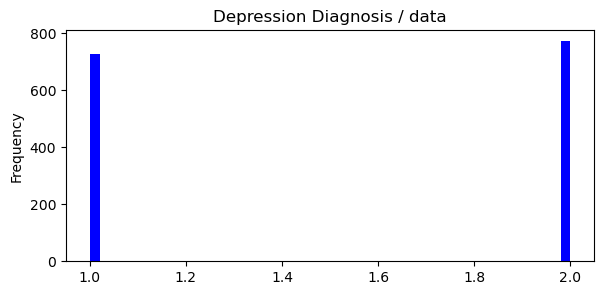

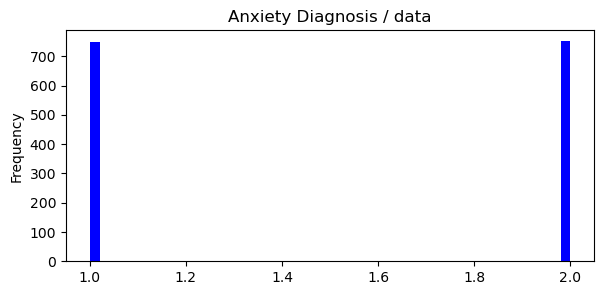

In [160]:
for feat in train_feature:
    plt.figure(figsize=(15,3))
    ax1 = plt.subplot(1,2,1)
    data[feat].plot(kind='hist', bins=50, color='blue')
    plt.title(feat + ' / data')
    plt.show()

# Feature Selection

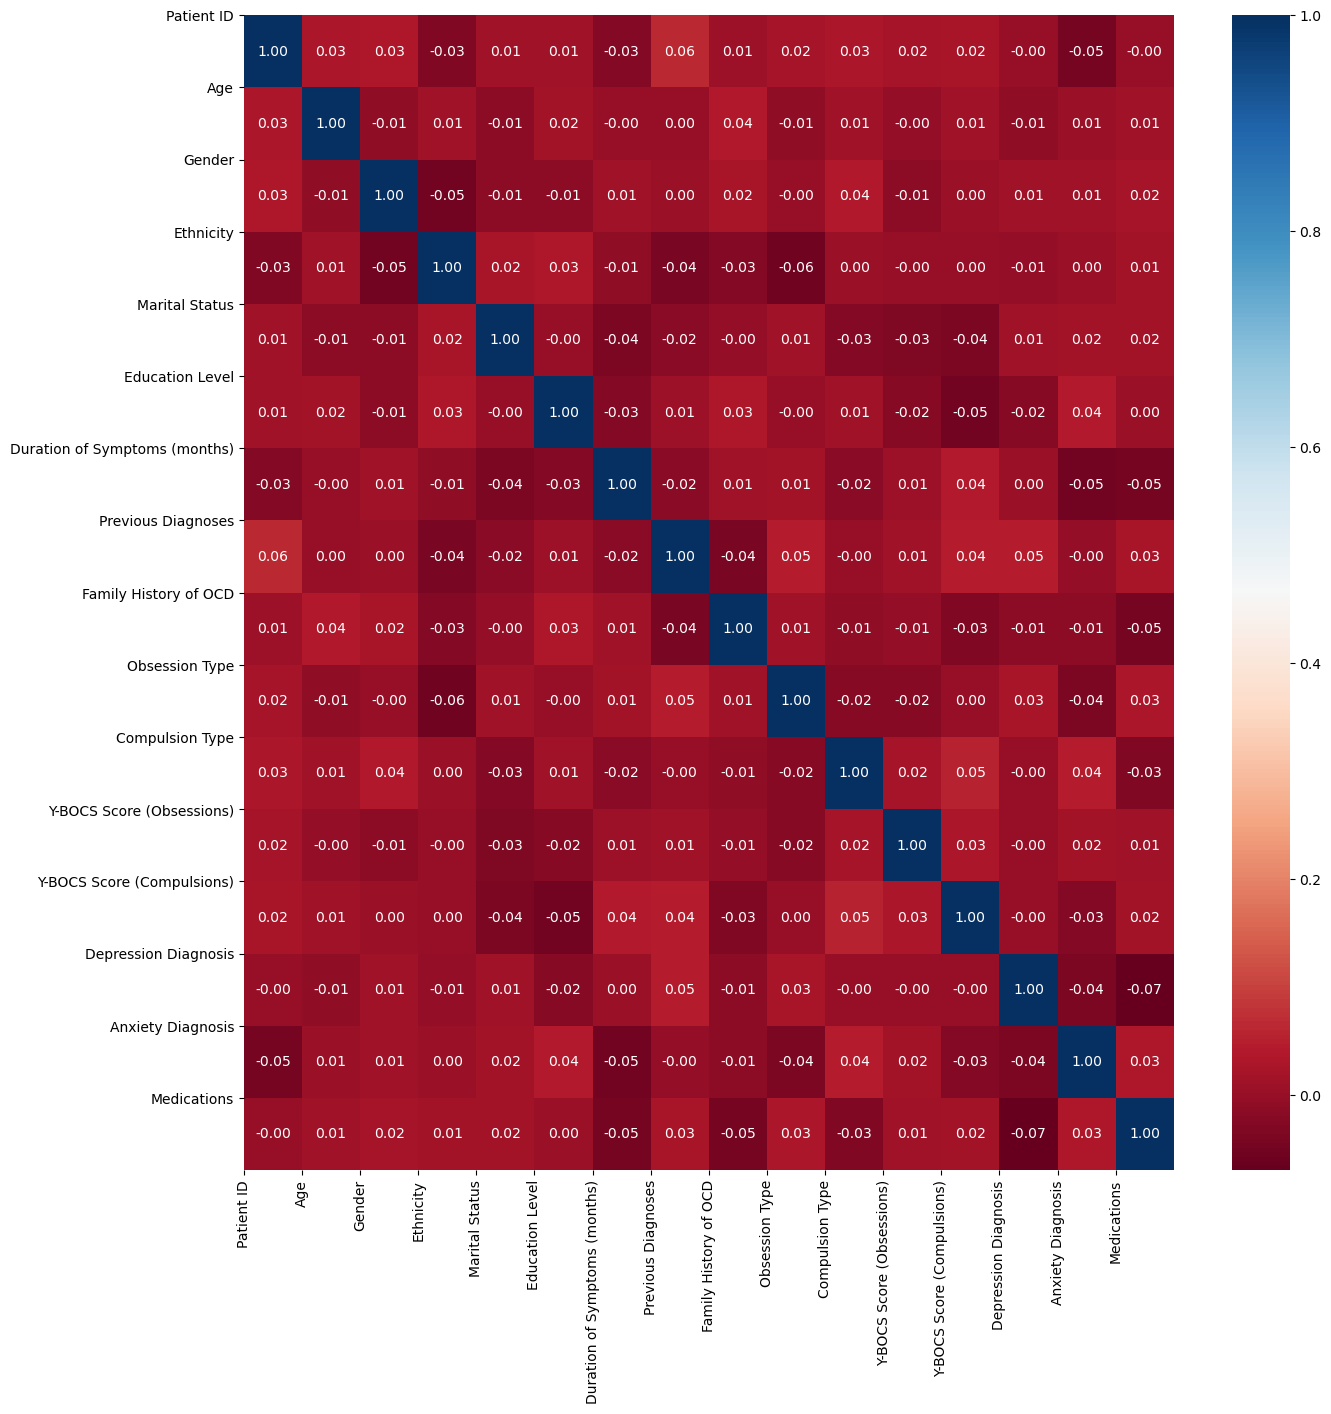

In [161]:
corr = data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [162]:
X= data.drop(columns=['Medications'],axis=1)
y= data['Medications']

In [163]:
X_train=X
y_train=y

from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
X_train = MinMaxScaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000111,0.245614,0.0,0.000000,0.0,0.000000,0.841880,0.25,0.0,0.00,0.00,0.425,0.250,1.0,1.0
1,0.154712,0.894737,1.0,0.000000,0.5,0.000000,0.743590,0.00,1.0,0.00,0.25,0.525,0.625,1.0,1.0
2,0.019047,0.684211,1.0,0.333333,0.5,0.333333,0.713675,0.25,0.0,0.25,0.00,0.075,0.100,0.0,0.0
3,0.577300,0.157895,0.0,0.333333,1.0,0.333333,0.512821,0.50,1.0,0.50,0.25,0.350,0.700,1.0,1.0
4,0.535420,0.666667,0.0,0.333333,1.0,0.666667,0.692308,0.50,1.0,0.75,0.50,0.975,0.450,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.485297,0.350877,1.0,0.333333,0.5,0.333333,0.200855,0.25,0.0,0.25,0.25,0.525,0.825,1.0,1.0
1496,0.445088,0.017544,0.0,0.333333,0.5,1.000000,0.658120,0.75,1.0,0.75,0.75,0.625,0.400,1.0,1.0
1497,0.564937,0.385965,1.0,0.666667,1.0,0.000000,0.401709,0.00,1.0,0.25,1.00,0.050,0.375,1.0,1.0
1498,0.310871,0.333333,0.0,1.000000,1.0,0.000000,0.871795,0.75,1.0,0.25,0.25,0.400,0.175,1.0,0.0


# Modeling

In [182]:
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.25,random_state=2019)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_eval: ", X_eval.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_eval",y_eval.shape)

Shape of X_train:  (843, 15)
Shape of X_eval:  (282, 15)
Shape of y_train:  (843,)
Shape of y_eval (282,)


Logistic Regression Model

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initializing the Logistic Regression model
logreg_model = LogisticRegression()

# Training the model
logreg_model.fit(X_train, y_train)


LogisticRegression()

In [167]:
y_pred = logreg_model.predict(X_eval)

In [168]:
accuracy_logreg = accuracy_score(y_eval, y_pred)
conf_matrix_logreg = confusion_matrix(y_eval, y_pred)
class_report_logreg = classification_report(y_eval, y_pred)


In [169]:
print(f'Logistic Regression Accuracy: {accuracy_logreg:.4f}')
print('\nLogistic Regression Confusion Matrix:')
print(conf_matrix_logreg)
print('\nLogistic Regression Classification Report:')
print(class_report_logreg)


Logistic Regression Accuracy: 0.2400

Logistic Regression Confusion Matrix:
[[18 14 41 36]
 [13 12 29 27]
 [17  9 30 28]
 [13 17 41 30]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.17      0.21       109
           1       0.23      0.15      0.18        81
           2       0.21      0.36      0.27        84
           3       0.25      0.30      0.27       101

    accuracy                           0.24       375
   macro avg       0.25      0.24      0.23       375
weighted avg       0.25      0.24      0.23       375



In [172]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
clf1 = SVC()
#clf2 = LGBMClassifier()
clf3 = LogisticRegression()
clf4 = SGDClassifier()
clf5 = XGBClassifier(objective='multi:softmax')
clf6 = KNeighborsClassifier()
clf7 = RandomForestClassifier()
clf8 = ExtraTreesClassifier()
clf9 = HistGradientBoostingClassifier()

eclf = VotingClassifier(estimators=[('svm', clf1), ('Log', clf3), ('SGD', clf4), ('XGBoost', clf5), ('KNeighbors', clf6), ('RandomForest', clf7), ('ExtraTrees', clf8), ('HistGradientBoosting', clf9)],voting='hard')

In [186]:
for clf, label in zip([clf1, clf3, clf4, clf5,clf6,clf7,clf8,clf9, eclf], ['SVC', 'Log','SGD','XGBoost','KNeighbors','RandomForest','ExtraTrees','HistGradientBoosting', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label)

SyntaxError: incomplete input (2267202031.py, line 3)

In [176]:
eclf

VotingClassifier(estimators=[('svm', SVC()), ('Log', LogisticRegression()),
                             ('SGD', SGDClassifier()),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_po...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softmax', ...)),
                             ('KNeighbors', KNeighborsClassifier()),
                             ('RandomForest', RandomForestClassifier()),
                             ('ExtraTrees', ExtraTreesClassifier()),
                             ('HistGradientBoosting',
                              HistGradientBoostingClassifier())])

Voting accuracy is: 23.200%


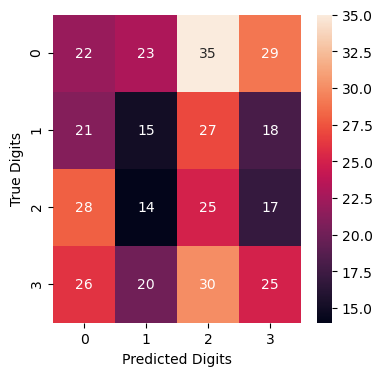

In [177]:
clf1 = clf1.fit(X_train, y_train)
#clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
clf4 = clf4.fit(X_train, y_train)
clf5 = clf5.fit(X_train, y_train)
clf6 = clf6.fit(X_train, y_train)
clf7 = clf7.fit(X_train, y_train)
clf8 = clf8.fit(X_train, y_train)
clf9 = clf9.fit(X_train, y_train)

Voting_model = eclf.fit(X_train, y_train)

y_pred_Voting = Voting_model.predict(X_eval) # predict our file test data
Voting_acc = accuracy_score(y_eval, y_pred_Voting)
print("Voting accuracy is: {0:.3f}%".format(Voting_acc * 100))
cm = confusion_matrix(y_eval, y_pred_Voting)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

In [178]:
Voting_model

VotingClassifier(estimators=[('svm', SVC()), ('Log', LogisticRegression()),
                             ('SGD', SGDClassifier()),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_po...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softmax', ...)),
                             ('KNeighbors', KNeighborsClassifier()),
                             ('RandomForest', RandomForestClassifier()),
                             ('ExtraTrees', ExtraTreesClassifier()),
                             ('HistGradientBoosting',
                              HistGradientBoostingClassifier())])

Random Forest

In [184]:
clf7 = RandomForestClassifier()
clf7.fit(X_train, y_train)

y_pred_rf = clf7.predict(X_eval)

# Evaluating the model
accuracy_rf = accuracy_score(y_eval, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_eval, y_pred_rf)
class_report_rf = classification_report(y_eval, y_pred_rf)

In [187]:
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print('\nRandom Forest Confusion Matrix:')
print(conf_matrix_rf)
print('\nRandom Forest Classification Report:')
print(class_report_rf)

Random Forest Accuracy: 0.2518

Random Forest Confusion Matrix:
[[21 10 23 12]
 [14 16 20 17]
 [20 18 22 15]
 [14 15 33 12]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.32      0.31        66
           1       0.27      0.24      0.25        67
           2       0.22      0.29      0.25        75
           3       0.21      0.16      0.18        74

    accuracy                           0.25       282
   macro avg       0.25      0.25      0.25       282
weighted avg       0.25      0.25      0.25       282



XG Boost

In [192]:
clf5 = XGBClassifier(objective='multi:softmax')
clf5.fit(X_train, y_train)

y_pred_xgb = clf5.predict(X_eval)

# Evaluating the model
accuracy_xgb = accuracy_score(y_eval, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_eval, y_pred_xgb)
class_report_xgb = classification_report(y_eval, y_pred_xgb)

In [193]:
print(f'XGB Accuracy: {accuracy_xgb:.4f}')
print('\nXGB Confusion Matrix:')
print(conf_matrix_xgb)
print('\nXGB Classification Report:')
print(class_report_xgb)

XGB Accuracy: 0.2518

XGB Confusion Matrix:
[[16 17 22 11]
 [17 16 22 12]
 [15 23 23 14]
 [17 22 19 16]]

XGB Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.24      0.24        66
           1       0.21      0.24      0.22        67
           2       0.27      0.31      0.29        75
           3       0.30      0.22      0.25        74

    accuracy                           0.25       282
   macro avg       0.26      0.25      0.25       282
weighted avg       0.26      0.25      0.25       282



Extra Trees classification

In [194]:
clf8 = ExtraTreesClassifier()
clf8.fit(X_train, y_train)

y_pred_xt = clf8.predict(X_eval)

# Evaluating the model
accuracy_xt = accuracy_score(y_eval, y_pred_xt)
conf_matrix_xt = confusion_matrix(y_eval, y_pred_xt)
class_report_xt = classification_report(y_eval, y_pred_xt)

In [198]:
print(f'Extra trees Accuracy: {accuracy_xt:.4f}')
print('\Extra trees Confusion Matrix:')
print(conf_matrix_xt)
print('\Extra trees Classification Report:')
print(class_report_xt)

Extra trees Accuracy: 0.2801
\Extra trees Confusion Matrix:
[[15 15 27  9]
 [ 9 18 23 17]
 [15 22 27 11]
 [16 11 28 19]]
\Extra trees Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.23      0.25        66
           1       0.27      0.27      0.27        67
           2       0.26      0.36      0.30        75
           3       0.34      0.26      0.29        74

    accuracy                           0.28       282
   macro avg       0.29      0.28      0.28       282
weighted avg       0.29      0.28      0.28       282



In [199]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

# Define the model
clf = ExtraTreesClassifier()

# Define a range of hyperparameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Set up the grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimato

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [202]:
# Get the best parameters and the corresponding best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.28230487461256687
